In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_data=ImageDataGenerator(rescale=1./255)

In [5]:
import zipfile as zf

files = zf.ZipFile(r"C:\project\Flowers-Dataset.zip")
files.extractall()
files.close()

In [7]:
import glob
import zipfile

In [8]:
files = glob.glob("C:\project\Flowers-Dataset.zip")

In [9]:
files

['C:\\project\\Flowers-Dataset.zip']

In [10]:
for file in files:
    print('Unzipping:',file)

    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('data/raw')

Unzipping: C:\project\Flowers-Dataset.zip


In [11]:
file

'C:\\project\\Flowers-Dataset.zip'

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen= ImageDataGenerator(rescale=1./255,zoom_range = 0.2,horizontal_flip =True,vertical_flip =False)

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
x_train = train = train_datagen.flow_from_directory(r'C:\project\data\raw\flowers\tulip',target_size = (10,10),class_mode ='categorical',batch_size=10)

Found 0 images belonging to 0 classes.


In [18]:
x_test = test_datagen.flow_from_directory(r'C:\project\data\raw\flowers\rose',target_size = (1,5),class_mode ='categorical',batch_size=10)

Found 0 images belonging to 0 classes.


In [19]:
x_train.class_indices

{}

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [22]:
model= Sequential()

In [23]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation = 'relu')) 

In [24]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [25]:
model.add(Flatten())

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [27]:
32*(3*3*3+1)

896

In [28]:
model.add(Dense(300, activation = 'relu'))
model.add(Dense(150,activation ='relu'))

In [29]:
model.add(Dense(4,activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [31]:
len(x_train)

0

In [32]:
len(x_test)

0

In [33]:
model.save('flower.h5')


In [34]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [35]:
odel = load_model('flower.h5')

In [37]:
img = image.load_img(r"C:\project\data\raw\flowers\tulip\15976769174_1d50f46ca1_m.jpg")

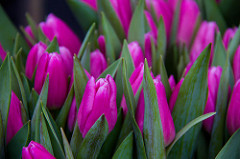

In [38]:
img

In [39]:
img = image.load_img(r"C:\project\data\raw\flowers\tulip\15976769174_1d50f46ca1_m.jpg",target_size=(64,64))

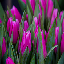

In [40]:
img

In [41]:
x=image.img_to_array(img)

In [42]:
x

array([[[ 0.,  0.,  0.],
        [ 2.,  2.,  4.],
        [ 2.,  1.,  6.],
        ...,
        [18., 41., 21.],
        [13., 27., 10.],
        [10., 21.,  7.]],

       [[ 2.,  2.,  2.],
        [ 1.,  0.,  4.],
        [ 3.,  2.,  7.],
        ...,
        [15., 36., 19.],
        [11., 25.,  8.],
        [ 9., 20.,  6.]],

       [[16., 29., 20.],
        [ 1.,  0.,  6.],
        [ 5.,  3., 14.],
        ...,
        [13., 29., 16.],
        [ 8., 22.,  9.],
        [ 7., 17.,  8.]],

       ...,

       [[19., 29., 31.],
        [ 0.,  3.,  0.],
        [ 3., 10.,  3.],
        ...,
        [44., 78., 77.],
        [41., 73., 70.],
        [23., 52., 47.]],

       [[12., 23., 25.],
        [ 0.,  1.,  0.],
        [ 1.,  7.,  3.],
        ...,
        [38., 70., 65.],
        [39., 71., 68.],
        [19., 46., 41.]],

       [[11., 19., 22.],
        [ 0.,  1.,  2.],
        [ 1.,  5.,  4.],
        ...,
        [37., 72., 68.],
        [32., 64., 61.],
        [21., 43., 40.]]

In [43]:
x.shape

(64, 64, 3)

In [44]:
x=np.expand_dims(x,axis=0)

In [45]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 385ms/step


In [46]:
y

array([2], dtype=int64)

In [47]:
x_train.class_indices

{}

In [49]:
index = ['daisy','dandelion','rose','sunflower','tulip']

In [60]:
index[y[-1]]

'rose'

In [61]:
index[4]

'tulip'